In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
tempo = pd.read_csv("/content/weatherHistory.csv", index_col=False, header=None, squeeze=True)
display(tempo)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222222222221,7.3888888888888875,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284000000000003,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96449,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.0167,26.0167,0.43,10.9963,31,16.1,0,1014.36,Partly cloudy starting in the morning.
96450,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.5833,24.5833,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96451,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.0389,22.0389,0.56,8.9838,30,16.1,0,1015.66,Partly cloudy starting in the morning.
96452,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.5222,21.5222,0.6,10.5294,20,16.1,0,1015.95,Partly cloudy starting in the morning.


## Letra a

In [ ]:
t = tempo[1:]
t = t.drop(columns=0)
t = t.dropna(axis=0)
t[3] = t[3].astype(str).astype(float)
t[4] = t[4].astype(str).astype(float)
t[5] = t[5].astype(str).astype(float)
t[6] = t[6].astype(str).astype(float)
t[7] = t[7].astype(str).astype(float)
t[8] = t[8].astype(str).astype(float)
t[9] = t[9].astype(str).astype(float)
t[10] = t[10].astype(str).astype(float)

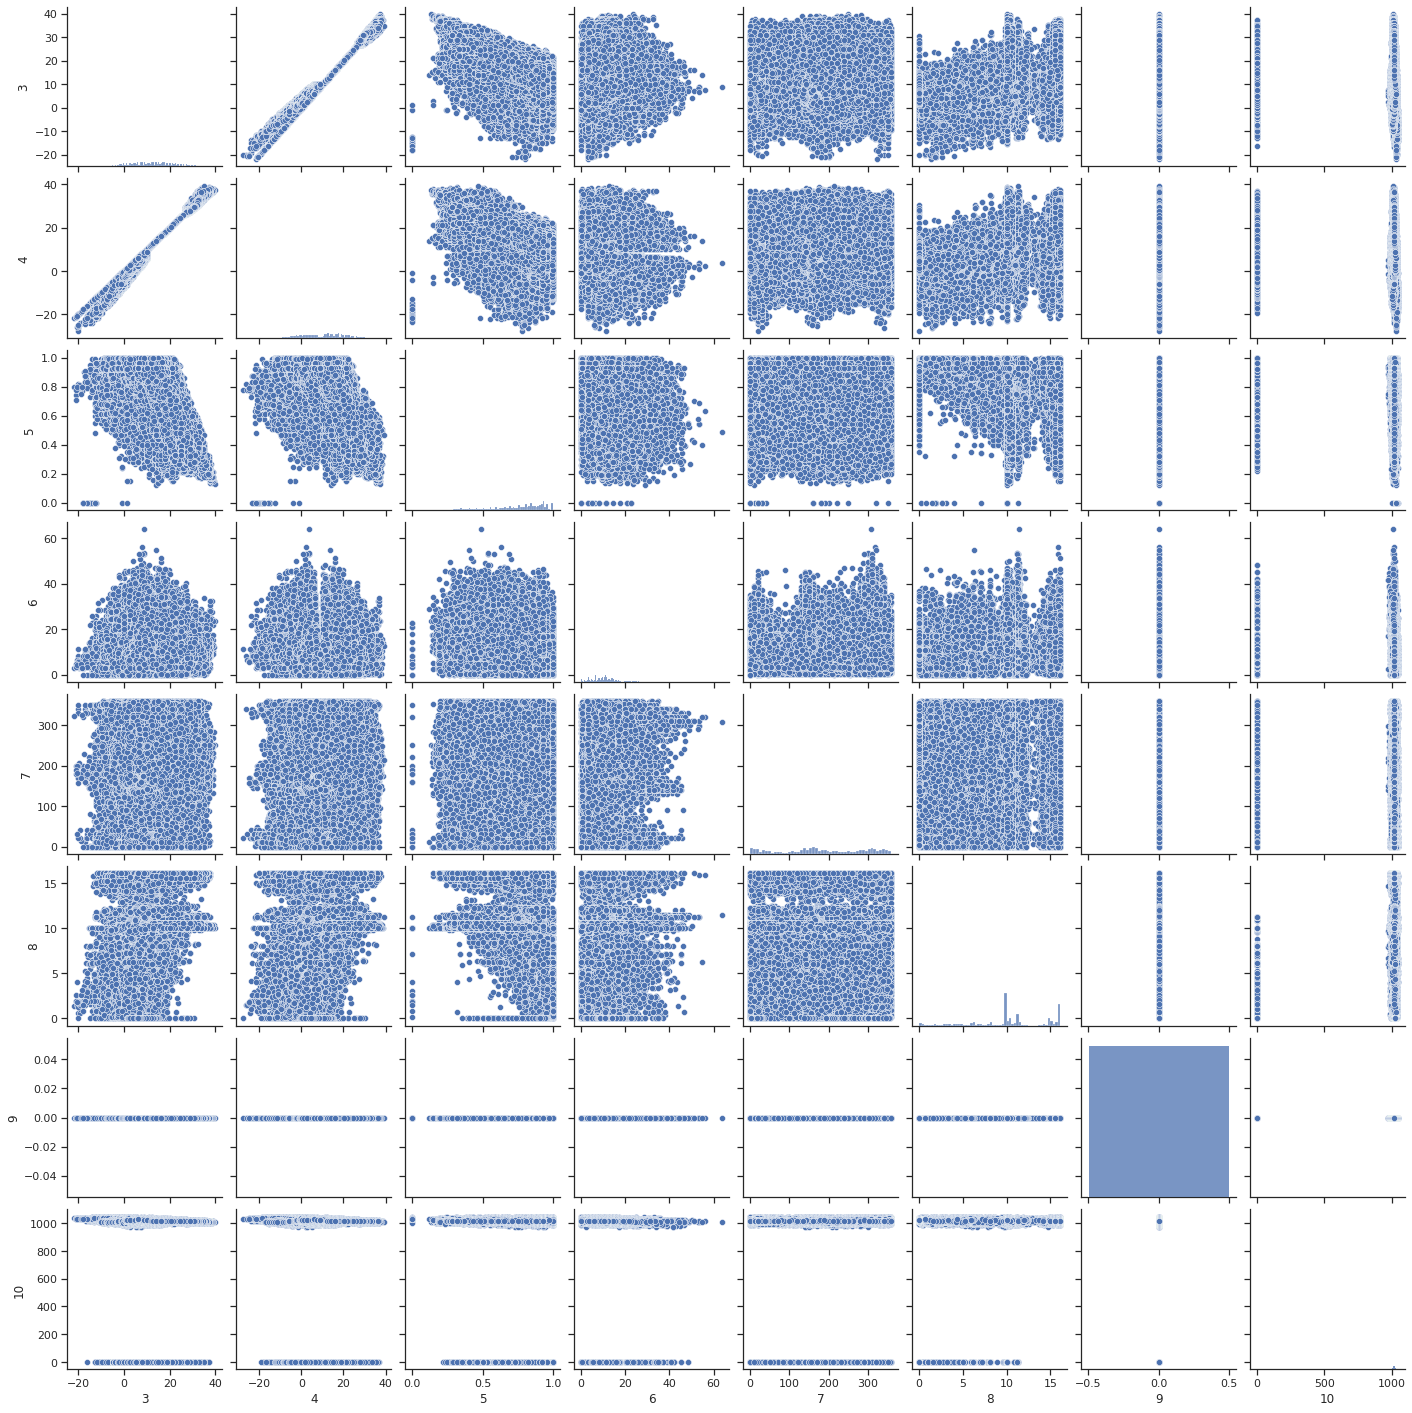

In [ ]:
sns.set(style="ticks")
sns.pairplot(t)
plt.show()

In [ ]:
Xtreinamento, Xteste, Ytreinamento, Yteste = train_test_split(t[[3,4,5,6,7,8,9,10]], t[2], test_size=0.2, random_state=0)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtreinamento, Ytreinamento)
print("Accuracy = {0}%".format(100*np.sum(knn.predict(Xteste) == Yteste)/len(Yteste)))

Accuracy = 98.08734625807797%


In [ ]:
# Validação Cruzada KNN

from sklearn.model_selection import cross_val_score
scoresKNN = cross_val_score(knn, t[[3,4,5,6,7,8,9,10]], t[2], cv=5)
print("Accuracy: %0.2f (+- %.2f)" % (scoresKNN.mean(), scoresKNN.std()*2))

Accuracy: 0.97 (+- 0.01)


In [ ]:
from sklearn import metrics

YPreditoKNN = knn.predict(Xteste)
print(metrics.classification_report(Yteste, YPreditoKNN))

              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     17026
        snow       0.93      0.90      0.91      2162

    accuracy                           0.98     19188
   macro avg       0.96      0.95      0.95     19188
weighted avg       0.98      0.98      0.98     19188



In [ ]:
# SVM
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(Xtreinamento, Ytreinamento)
print("Accuracy = {0}%".format(100*np.sum(svm.predict(Xteste) == Yteste)/len(Yteste)))

Accuracy = 99.89576818845111%


In [ ]:
# Validação Cruzada SVM

from sklearn.model_selection import cross_val_score
scoresSVM = cross_val_score(svm, t[[3,4,5,6,7,8,9,10]], t[2], cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+- %.2f)" % (scoresSVM.mean(), scoresSVM.std()*2))

Accuracy: 1.00 (+- 0.00)


In [ ]:
YPreditoSVM = svm.predict(Xteste)
print(metrics.classification_report(Yteste, YPreditoSVM))

              precision    recall  f1-score   support

        rain       1.00      1.00      1.00     17026
        snow       0.99      1.00      1.00      2162

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Xtreinamento, Ytreinamento)
print("Accuracy = {0}%".format(100*np.sum(dt.predict(Xteste) == Yteste)/len(Yteste)))

Accuracy = 100.0%


In [ ]:
# Validação Cruzada Decision Tree

from sklearn.model_selection import cross_val_score
scoresDT = cross_val_score(dt, t[[3,4,5,6,7,8,9,10]], t[2], cv=5)
print("Accuracy: %0.2f (+- %.2f)" % (scoresDT.mean(), scoresDT.std()*2))

Accuracy: 1.00 (+- 0.00)


In [ ]:
YPreditoDT = dt.predict(Xteste)
print(metrics.classification_report(Yteste, YPreditoDT))

              precision    recall  f1-score   support

        rain       1.00      1.00      1.00     17026
        snow       1.00      1.00      1.00      2162

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



Sim, o algoritmo de classificação Decision Tree foi rápido e obteve a maior acurácia, além de precisão máxima. O algoritmo SVM, apesar de ter obtido uma acurácia e precisão maiores que o KNN, demorou muito mais tempo para executar.

## Letra b

É improvável que os algoritmos SVM e Decision Tree possam ser melhorados, uma vez que já apresentam uma acurácia muito alta e uma precisão bastante elevada, atingindo os 100%. Apenas o KNN pode ser melhorado, mesmo assim já apresenta um resultado muito favorável, com acurácia de 98% e alta precisão.

## Letra c

Sim, o algoritmo mais lento foi o SVM, levando 1 minuto para executar. O Decision Tree foi o mais rápido entre os testados.

## Letra d


In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl

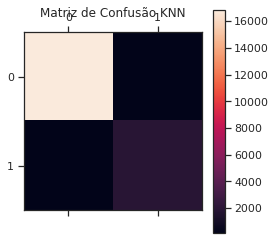

In [ ]:
matrixKNN = confusion_matrix(Yteste, YPreditoKNN)
pl.matshow(matrixKNN)
pl.title("Matriz de Confusão KNN")
pl.colorbar()
pl.show()

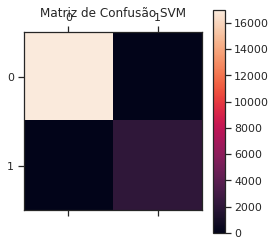

In [ ]:
matrixSVM = confusion_matrix(Yteste, YPreditoSVM)
pl.matshow(matrixSVM)
pl.title("Matriz de Confusão SVM")
pl.colorbar()
pl.show()

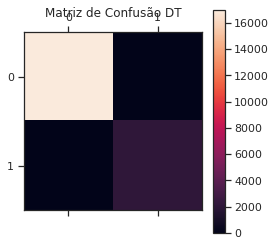

In [ ]:
matrixDT = confusion_matrix(Yteste, YPreditoDT)
pl.matshow(matrixDT)
pl.title("Matriz de Confusão DT")
pl.colorbar()
pl.show()